### 1. Adstock Transformation

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/simulated/marketing_mmm_dataset.csv")
def apply_adstock(series, decay=0.5):
    result = [series.iloc[0]]
    for i in range(1, len(series)):
        result.append(series.iloc[i] + decay * result[i-1])
    return pd.Series(result, index=series.index)

# Apply to spend columns
for col in ['TV_Spend', 'Radio_Spend', 'Digital_Spend', 'Influencer_Spend', 'OOH_Spend']:
    df[f'{col}_adstock'] = apply_adstock(df[col])


### 2. Build Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

# Features (adstocked + control vars)
X = df[[
    'TV_Spend_adstock', 'Radio_Spend_adstock', 'Digital_Spend_adstock',
    'Influencer_Spend_adstock', 'OOH_Spend_adstock',
    'Seasonality_Index', 'Holiday_Flag', 'Competitor_Activity'
]]

y = df['Sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R²: 0.37810524657070077
RMSE: 1895.4884236410342


### 3. Inspect Coefficients (Channel Importance)

<Axes: title={'center': 'Channel Impact on Sales'}>

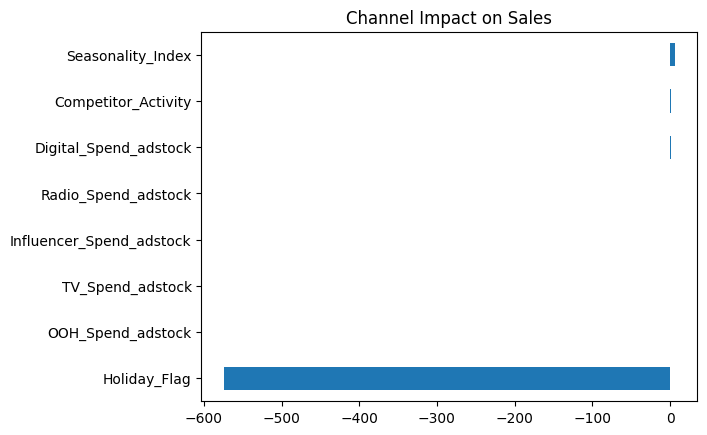

In [7]:
coefs = pd.Series(model.coef_, index=X.columns)
coefs.sort_values().plot(kind='barh', title='Channel Impact on Sales')
